# Dados - Q1

In [18]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import math
import seaborn as sns

## 1) Obtendo:
## Lista das estações automáticas:

In [3]:
# Buscando via API - INMET
aut_List = requests.get('https://apitempo.inmet.gov.br/estacoes/T')

In [4]:
# Listando os dados coletados:

# Lista de dicionários informativos de cada estação
dicts_list = []

# Lista dos nomes das estações
est_names = []

# Lista dos códigos das estações
est_codes = []

for estacao in aut_List.json():
    estDict = dict(estacao)
    est_names.append(estDict['DC_NOME'])
    est_codes.append(estDict['CD_ESTACAO'])
    dicts_list.append(estDict)


In [5]:
# criação do DataFrame
df_names = pd.DataFrame({'Name':[],'Code':[]}) 
for cada in dicts_list:
    df_names = df_names.append({'Name':cada['DC_NOME'], 'Code':cada['CD_ESTACAO']}, ignore_index=True)

df_names.to_csv('listaEstacoes.csv')
df_names

,Name,Code
0,ABROLHOS,A422
1,ACARAU,A360
2,AFONSO CLAUDIO,A657
3,AGUA BOA,A908
4,AGUA CLARA,A756
...,...,...
600,VITORIA DA CONQUISTA,A414
601,VOTUPORANGA,A729
602,XANXERE,A858
603,XINGUARA,A247


## Série de 14 dias:

In [6]:
est_codes

['A422',
 'A360',
 'A657',
 'A908',
 'A756',
 'A045',
 'A549',
 'A534',
 'A617',
 'A826',
 'A615',
 'A053',
 'A508',
 'A924',
 'A253',
 'A909',
 'A024',
 'A223',
 'A934',
 'A336',
 'A750',
 'A434',
 'S701',
 'A377',
 'A628',
 'A910',
 'A340',
 'A113',
 'A719',
 'A409',
 'A566',
 'A013',
 'A054',
 'A021',
 'A044',
 'S702',
 'A353',
 'A867',
 'A505',
 'A309',
 'A310',
 'A940',
 'A736',
 'A606',
 'A120',
 'A725',
 'A220',
 'A827',
 'A375',
 'S113',
 'A204',
 'A565',
 'S703',
 'A502',
 'A315',
 'A128',
 'A429',
 'A741',
 'A221',
 'A746',
 'A402',
 'A748',
 'A755',
 'A759',
 'A705',
 'A764',
 'A757',
 'A201',
 'A447',
 'F501',
 'A840',
 'A765',
 'A135',
 'A110',
 'A845',
 'A418',
 'A326',
 'S122',
 'S704',
 'A226',
 'A744',
 'S705',
 'A001',
 'A927',
 'A042',
 'A421',
 'A228',
 'A433',
 'A238',
 'A432',
 'A544',
 'S706',
 'A348',
 'A329',
 'A859',
 'A812',
 'A769',
 'A939',
 'A023',
 'A316',
 'A344',
 'A530',
 'S707',
 'A838',
 'A352',
 'A897',
 'A604',
 'A236',
 'B803',
 'A313',
 'A519',
 

In [7]:
# Escolhidas as estações a045 e a756

dataa045 = requests.get('https://apitempo.inmet.gov.br/estacao/diaria/2021-09-16/2021-09-30/A045').json()
dataa756 = requests.get('https://apitempo.inmet.gov.br/estacao/diaria/2021-09-16/2021-09-30/A756').json()

In [15]:
def df_transform(dictionary, export=False):
    '''
    Criação do DataFrame.
    Permite a exportação do DataFrame como um arquivo '.csv'

    args:
    -----
        obj: dict()
        export: boolean
        
    return:
    ------
        obj: pandas.DataFrame
    '''
    df = pd.DataFrame(dictionary)
    df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'])
    
    float_cols = ['UMID_MIN', 'TEMP_MED', 'CHUVA','VL_LATITUDE','TEMP_MIN','TEMP_MAX','VEL_VENTO_MED','VL_LONGITUDE','UMID_MED']
    for cada in float_cols:
        try:
            df[cada] = df[cada].apply(lambda x: float(x))
        except:
            pass
    if export==True:
        df.to_csv(dictionary[0]['CD_ESTACAO'])
    return df
    

In [9]:

a756 = df_transform(dataa756)
a045 = df_transform(dataa045, export=True)

In [10]:
a045

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
0,28.8,2021-09-16,AGUAS EMENDADAS,13.0,25.1,0.0,-15.596491,15.4,34.1,DF,2.7,A045,-47.625801
1,30.2,2021-09-17,AGUAS EMENDADAS,16.0,23.6,0.0,-15.596491,18.8,30.5,DF,3.1,A045,-47.625801
2,35.2,2021-09-18,AGUAS EMENDADAS,12.0,22.3,0.0,-15.596491,13.8,32.1,DF,2.3,A045,-47.625801
3,23.9,2021-09-19,AGUAS EMENDADAS,10.0,24.2,0.0,-15.596491,10.4,34.3,DF,2.5,A045,-47.625801
4,33.9,2021-09-20,AGUAS EMENDADAS,14.0,24.7,0.0,-15.596491,11.5,34.7,DF,2.1,A045,-47.625801
5,36.1,2021-09-21,AGUAS EMENDADAS,12.0,25.7,0.0,-15.596491,14.0,37.1,DF,1.6,A045,-47.625801
6,40.3,2021-09-22,AGUAS EMENDADAS,13.0,25.3,0.0,-15.596491,14.7,36.8,DF,1.7,A045,-47.625801
7,48.9,2021-09-23,AGUAS EMENDADAS,29.0,25.2,0.0,-15.596491,18.0,32.9,DF,2.8,A045,-47.625801
8,50.1,2021-09-24,AGUAS EMENDADAS,19.0,25.3,0.0,-15.596491,17.2,34.3,DF,2.0,A045,-47.625801
9,61.6,2021-09-25,AGUAS EMENDADAS,30.0,22.4,0.0,-15.596491,19.3,30.0,DF,1.4,A045,-47.625801


## Falhas nos dados

1) Observando o mapa de calor para dados nulos:


<AxesSubplot:>

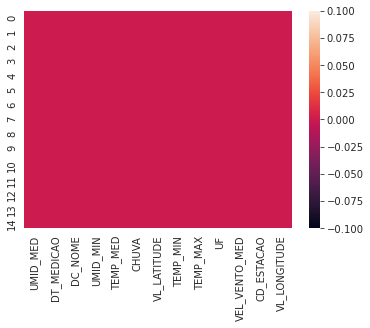

In [31]:
sns.heatmap(a045.isnull())

<AxesSubplot:>

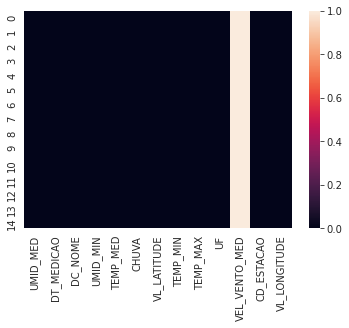

In [32]:
sns.heatmap(a756.isnull())
# observa-se que durante o intervalo de 14 dias, a velocidade do vento não foi medida nessa estação

In [33]:
def evaluate(df):
    '''
    Avalia os dados nulos retornando a coluna e a lista dos respectivos index.
    
    args:
    -----
        obj: pandas.DataFrame
        
    return:
    ------
        obj: dict
    '''
    nulos = df.isnull()
    missing_dict = {}
    idx_list = list()
    for column in nulos:
        for index in nulos.index:
            if nulos[column].loc[index] == True:
                idx_list.append(index)
                missing_dict.update({column:idx_list})

    return missing_dict

In [34]:
evaluate(a756)

{'VEL_VENTO_MED': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}

In [37]:
def evaluatespurs(df):
    '''
    Avalia os dados espúrios retornando a coluna e a lista dos respectivos index.
    
    args:
    -----
        obj: pandas.DataFrame
        
    return:
    ------
        obj: dict
    '''

    float_cols = ['UMID_MIN', 'TEMP_MED', 'CHUVA','VL_LATITUDE','TEMP_MIN','TEMP_MAX','VEL_VENTO_MED','VL_LONGITUDE','UMID_MED']
    
    for cada in float_cols:
        try:
            df[cada] = df[cada].apply(lambda x: float(x))
        except:
            pass
    
     
    outliers_dict = dict()
    for col in float_cols:
        for cada in df[col]:
            mean = df[col].mean()
            try:
                dif = float(cada) - float(mean)
                # verificando se os valores estão muito discrepantes relativos à média.
                if math.fabs(dif) > 100:
                    # listando index questionáveis:
                    outliers_dict.update({col:cada.index})
                    
            except:
                pass

    return outliers_dict   
    

## Plot

In [20]:
conc = pd.concat([a045, a756])

In [21]:
conc

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
0,28.8,2021-09-16,AGUAS EMENDADAS,13.0,25.1,0.0,-15.596491,15.4,34.1,DF,2.7,A045,-47.625801
1,30.2,2021-09-17,AGUAS EMENDADAS,16.0,23.6,0.0,-15.596491,18.8,30.5,DF,3.1,A045,-47.625801
2,35.2,2021-09-18,AGUAS EMENDADAS,12.0,22.3,0.0,-15.596491,13.8,32.1,DF,2.3,A045,-47.625801
3,23.9,2021-09-19,AGUAS EMENDADAS,10.0,24.2,0.0,-15.596491,10.4,34.3,DF,2.5,A045,-47.625801
4,33.9,2021-09-20,AGUAS EMENDADAS,14.0,24.7,0.0,-15.596491,11.5,34.7,DF,2.1,A045,-47.625801
5,36.1,2021-09-21,AGUAS EMENDADAS,12.0,25.7,0.0,-15.596491,14.0,37.1,DF,1.6,A045,-47.625801
6,40.3,2021-09-22,AGUAS EMENDADAS,13.0,25.3,0.0,-15.596491,14.7,36.8,DF,1.7,A045,-47.625801
7,48.9,2021-09-23,AGUAS EMENDADAS,29.0,25.2,0.0,-15.596491,18.0,32.9,DF,2.8,A045,-47.625801
8,50.1,2021-09-24,AGUAS EMENDADAS,19.0,25.3,0.0,-15.596491,17.2,34.3,DF,2.0,A045,-47.625801
9,61.6,2021-09-25,AGUAS EMENDADAS,30.0,22.4,0.0,-15.596491,19.3,30.0,DF,1.4,A045,-47.625801


<AxesSubplot:xlabel='DT_MEDICAO', ylabel='TEMP_MIN'>

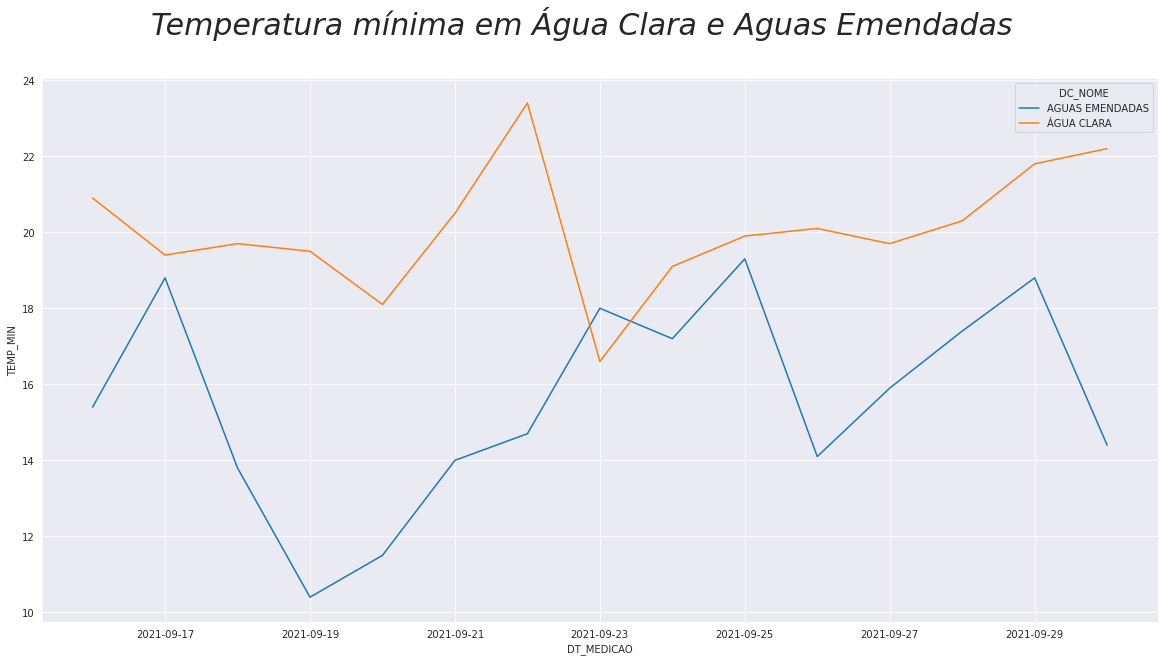

In [44]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))
fig.suptitle("Temperatura mínima em Água Clara e Aguas Emendadas", fontsize=30, fontstyle='oblique')

sns.lineplot(x=conc['DT_MEDICAO'], y=conc['TEMP_MIN'], hue=conc['DC_NOME'])
#ax.plot(a045['DT_MEDICAO'], a045['TEMP_MIN'])
#ax.plot(a756['DT_MEDICAO'], a756['TEMP_MIN'])

<AxesSubplot:xlabel='DT_MEDICAO', ylabel='TEMP_MED'>

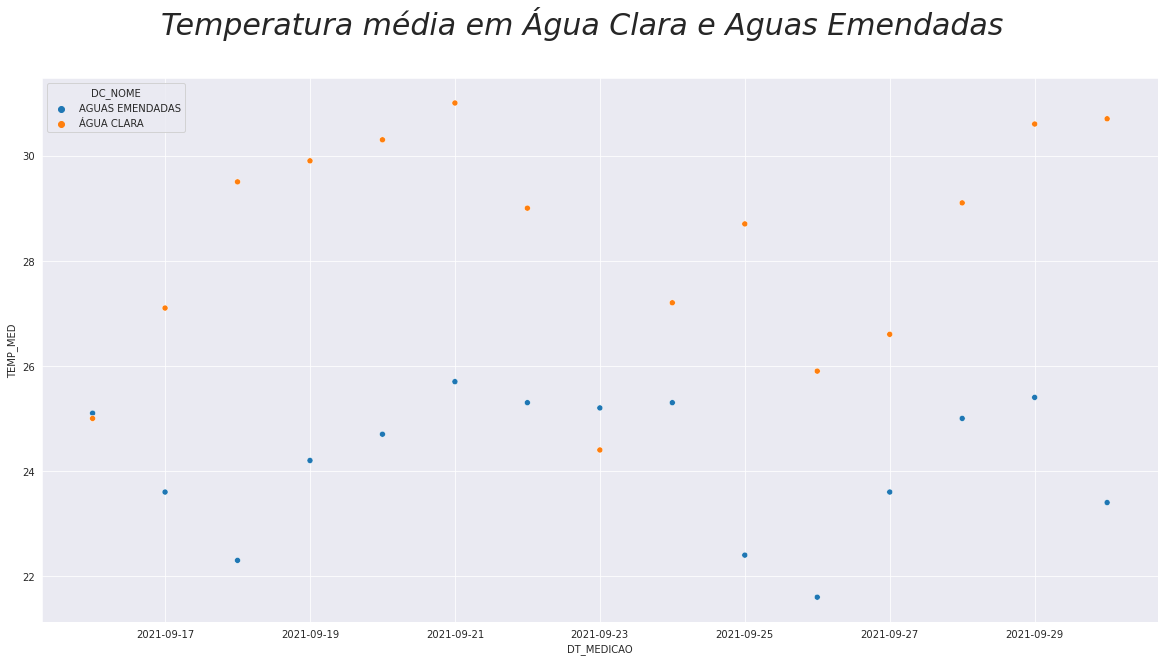

In [45]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))
fig.suptitle("Temperatura média em Água Clara e Aguas Emendadas", fontsize=30, fontstyle='oblique')

sns.scatterplot(x=conc['DT_MEDICAO'], y=conc['TEMP_MED'], hue=conc['DC_NOME'])

## Iteração na API para request de todos os dados

In [6]:
# Buscando os 14 dias (2021-09-16 até 2021-09-30)
# Como a API exige o código da estação, será feita uma iteração com a lista obtida anteriormente (est_codes) 
list14_days = []
dict_14days = {} # dicionário com todas as estações e seus respectivos dados no intervalo
for code in est_codes:
    data14 = requests.get('https://apitempo.inmet.gov.br/estacao/diaria/2021-09-16/2021-09-30/'+code)
    try:
        dict_14days.update({code:data14.json()})
        list14_days.append(data14.json())
    except:
        print('Algo de errado com a API dessa estação.')

Algo de errado com a API dessa estação.
Algo de errado com a API dessa estação.
Algo de errado com a API dessa estação.
Algo de errado com a API dessa estação.
Algo de errado com a API dessa estação.
Algo de errado com a API dessa estação.
Algo de errado com a API dessa estação.
Algo de errado com a API dessa estação.


In [7]:
# Para escolha da estação, esta seção
# está listando os códigos das estações que tenham pelo menos o primeiro dia com dado de temperatura mínima
validas = []
for chave in dict_14days.keys():
    if pd.DataFrame(dict_14days[chave])['TEMP_MIN'].isnull()[0] == False:
        validas.append(chave)
validas

['A756',
 'A045',
 'A549',
 'A826',
 'A615',
 'A053',
 'A508',
 'A909',
 'A024',
 'A934',
 'A336',
 'A434',
 'S701',
 'A409',
 'A566',
 'A054',
 'S702',
 'A867',
 'A505',
 'A310',
 'A606',
 'A220',
 'A375',
 'S113',
 'A502',
 'A402',
 'A755',
 'A705',
 'A201',
 'F501',
 'A840',
 'A845',
 'A326',
 'A744',
 'A001',
 'A042',
 'A433',
 'A329',
 'A859',
 'A530',
 'A897',
 'A604',
 'A313',
 'A884',
 'A702',
 'A912',
 'A706',
 'A607',
 'A898',
 'A879',
 'A811',
 'A365',
 'A887',
 'A248',
 'A337',
 'A554',
 'A629',
 'A742',
 'A034',
 'A548',
 'A876',
 'B806',
 'A520',
 'A557',
 'A374',
 'A416',
 'A724',
 'A720',
 'A901',
 'A448',
 'A807',
 'A860',
 'A537',
 'A038',
 'A848',
 'A564',
 'A252',
 'S107',
 'A536',
 'A603',
 'A029',
 'A893',
 'A442',
 'A351',
 'A535',
 'A311',
 'A806',
 'A524',
 'A039',
 'A452',
 'A305',
 'A708',
 'A046',
 'A875',
 'A364',
 'A022',
 'A002',
 'A014',
 'A533',
 'A019',
 'A349',
 'A555',
 'A319',
 'A410',
 'A225',
 'A823',
 'A424',
 'A417',
 'A408',
 'A121',
 'A550',
 